# Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

import spacy
from tqdm import tqdm
from collections import Counter

plt.style.use('seaborn-v0_8-dark') 

In [2]:
#Load SOTU.csv from data folder
sou = pd.read_csv("data/SOTU.csv")

nlp = spacy.load("en_core_web_sm")

## Analyzing topics using LDA Model

### Preprocess data (run once)

In [ ]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

processed_docs = sou['Text'].apply(preprocess_text)

processed_docs.to_pickle("data/processed_docs.pkl")

### Read in preprocessed data

In [3]:
texts = pd.read_pickle("data/processed_docs.pkl")

### Constructing Dictionary and training LDA model

In [4]:
# create dictionary and filter extremes
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# train LDA model with 18 topics
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus=corpus, num_topics=18, id2word=dictionary, random_state=42, passes=10)

### Print top 10 words for each topic

In [5]:
print("\n--- LDA Topics ---") 
for idx, topic in lda_model.print_topics(-1): 
    print(f"Topic: {idx} \nWords: {topic}\n")


--- LDA Topics ---
Topic: 0 
Words: 0.004*"cent" + 0.004*"june" + 0.004*"gold" + 0.003*"island" + 0.003*"silver" + 0.003*"bond" + 0.003*"method" + 0.003*"convention" + 0.003*"indian" + 0.003*"note"

Topic: 1 
Words: 0.008*"depression" + 0.007*"program" + 0.007*"recovery" + 0.006*"budget" + 0.006*"unemployment" + 0.006*"loan" + 0.006*"activity" + 0.006*"farm" + 0.005*"emergency" + 0.005*"cent"

Topic: 2 
Words: 0.008*"dictator" + 0.005*"expression" + 0.004*"british" + 0.004*"1914" + 0.003*"impressive" + 0.003*"actual" + 0.003*"revolution" + 0.003*"schedule" + 0.003*"continent" + 0.003*"partisanship"

Topic: 3 
Words: 0.008*"forest" + 0.007*"corporation" + 0.005*"judge" + 0.005*"wrong" + 0.005*"interstate" + 0.004*"employee" + 0.003*"bureau" + 0.003*"body" + 0.003*"mountain" + 0.003*"island"

Topic: 4 
Words: 0.017*"program" + 0.014*"soviet" + 0.009*"1980" + 0.009*"u.s." + 0.008*"area" + 0.007*"major" + 0.006*"goal" + 0.006*"commitment" + 0.006*"challenge" + 0.006*"nuclear"

Topic: 5 
W

### Topic Distribution for First Speech

In [6]:
lda_model.get_document_topics(corpus[0])

[(11, np.float32(0.99942815))]

### Interactive Visualization of topics

In [7]:
pyLDAvis.enable_notebook()
int_lda_dist = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(int_lda_dist, "outputs/interactive_lda_model")
int_lda_dist

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124490 -0.021460       1        1  25.619796
6     -0.177721  0.042077       2        1  19.981033
5      0.215260  0.071386       3        1   9.901162
7      0.135347 -0.070053       4        1   9.756259
8     -0.048065 -0.119211       5        1   7.285937
17    -0.174387  0.056450       6        1   5.735792
13    -0.173280  0.057692       7        1   5.117080
9     -0.065566 -0.065617       8        1   3.673824
11     0.221114  0.096518       9        1   3.313084
12     0.108985 -0.107040      10        1   3.208181
4      0.170987 -0.059934      11        1   2.417549
3     -0.048335 -0.061174      12        1   1.964508
1      0.001805 -0.137938      13        1   1.024306
14     0.149811  0.117592      14        1   0.773046
15    -0.097709  0.071397      15        1   0.174831
2     -0.030759  0.033480      16        1   0.045779
10    -0.027617  0.048256      17        1   0.003916
16    -0.035383  0.047579      18        1   0.003916, topic_info=           Term         Freq        Total Category  logprob  loglift
509     program  1272.000000  1272.000000  Default  30.0000  30.0000
978      mexico   852.000000   852.000000  Default  29.0000  29.0000
31    americans   990.000000   990.000000  Default  28.0000  28.0000
5330    article   492.000000   492.000000  Default  27.0000  27.0000
666     tonight   667.000000   667.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3221     method     0.007818   526.093971  Topic18  -7.4658  -0.9690
664       today     0.007947   576.861497  Topic18  -7.4494  -1.0447
1148    appoint     0.007382   419.003878  Topic18  -7.5231  -0.7987
31    americans     0.008294   990.579258  Topic18  -7.4067  -1.5427
2624       cent     0.007440   614.048075  Topic18  -7.5154  -1.1731

[1282 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4847      4  0.881688  --the
4847      8  0.080153  --the
3170      1  0.132787   11th
3170      2  0.079672   11th
3170      6  0.292131   11th
...     ...       ...    ...
744       9  0.116606  young
744      10  0.003239  young
744      11  0.016195  young
744      12  0.009717  young
744      14  0.009717  young

[5615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 6, 8, 9, 18, 14, 10, 12, 13, 5, 4, 2, 15, 16, 3, 11, 17])

## Analyzing topics using BERTopic

In [8]:
docs = sou['Text'].to_list()

### Training the model

In [9]:
# Building model
topic_model = BERTopic(min_topic_size=3, calculate_probabilities=True, verbose=True)
            
# Building vectorizer model to remove stop words
vectorizer_model = CountVectorizer(stop_words='english')

# Fitting model to the speeches
topics, probs = topic_model.fit_transform(docs)

# Removing stop words from topics
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

2025-11-22 02:21:07,695 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2025-11-22 02:21:17,160 - BERTopic - Embedding - Completed ✓
2025-11-22 02:21:17,160 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-22 02:21:27,560 - BERTopic - Dimensionality - Completed ✓
2025-11-22 02:21:27,561 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-22 02:21:27,589 - BERTopic - Cluster - Completed ✓
2025-11-22 02:21:27,593 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-22 02:21:29,067 - BERTopic - Representation - Completed ✓


### Output top 10 words for each topic

In [10]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,61,-1_states_government_united_congress,"[states, government, united, congress, year, w...",[\nJump toPart II |Part III\nPart 1. [On Our F...
1,0,25,0_world_years_people_new,"[world, years, people, new, american, america,...","[\nMr. Speaker, Mr. President, my colleagues i..."
2,1,17,1_states_government_united_congress,"[states, government, united, congress, departm...",[\nFellow Citizens of the Senate and of the Ho...
3,2,12,2_america_american_americans_people,"[america, american, americans, people, tonight...","[\nMr. Speaker, Mr. Vice President, Members of..."
4,3,12,3_government_states_year_united,"[government, states, year, united, law, congre...",[\nTo the Senate and House of Representatives:...
5,4,12,4_government_law_great_work,"[government, law, great, work, public, congres...",[\nTo the Senate and House of Representatives:...
6,5,11,5_world_soviet_nations_peace,"[world, soviet, nations, peace, economic, free...","[\nMr. President, Mr. Speaker, Members of the ..."
7,6,9,6_states_united_congress_government,"[states, united, congress, government, year, t...",[\nTo the Senate and House of Representatives:...
8,7,9,7_national_federal_government_war,"[national, federal, government, war, congress,...",[\nMEMBERS OF THE CONGRESS:\nSo many problems ...
9,8,9,8_states_public_government_united,"[states, public, government, united, present, ...",[\nFellow-Citizens of the Senate and of the Ho...


### Topic Distribution for the First Speech

100%|██████████| 1/1 [00:15<00:00, 15.42s/it]


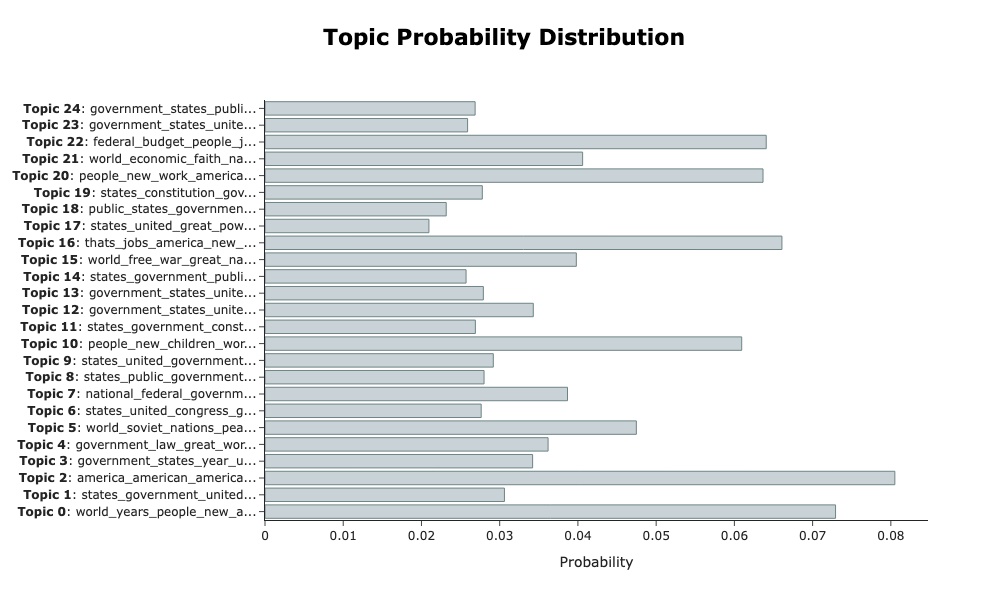

In [11]:
distribution, _ = topic_model.approximate_distribution(docs, min_similarity=0)
topic_dist = topic_model.visualize_distribution(distribution[0])
topic_dist.write_html("outputs/BERtopic_dist")
topic_dist

### Visualizing Topics

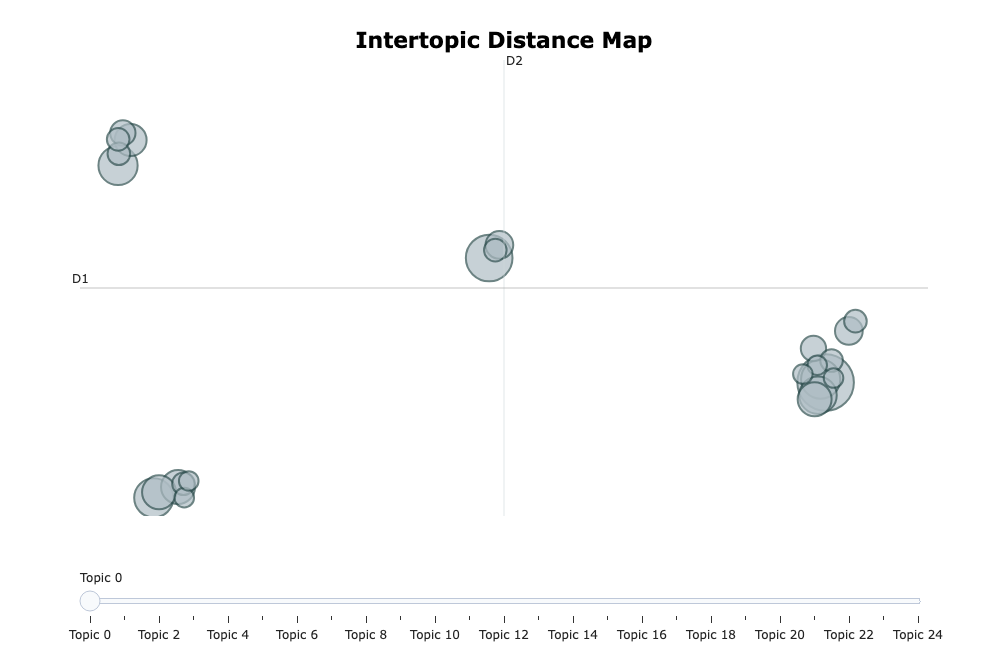

In [12]:
int_topic_dist = topic_model.visualize_topics()
int_topic_dist.write_html("outputs/interactive_BERtopic_distribution")
int_topic_dist